# 1.  Importing the Libraries
We will use the `numpy` and `pandas` libraries to work with numbers and data. To visualize data we will use the `matplotlib` and `seaborn` libraries. We will be using `xgboost` as our regression techinuqe. 

In [59]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

import xgboost as xgb

# 2. Loading and Visualize the Dataset

In [61]:
# training data
df_train=pd.read_csv('./train.csv')

# test data
df_test=pd.read_csv('./test.csv')

In [62]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# 3. Preprocessing the Data
We need to know the number of null values present in our dataset. Therefore, we will use the following code and found that:
* There are 19 columns in training data with null values 
* There are 33 columns in testing data with null values 

In [66]:
## Number of coloumns in training data having null values
df_train.isnull().sum().sort_values(
    ascending=False
).iloc[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [67]:
## Number of coloumns in testing data having null values
df_test.isnull().sum().sort_values(
    ascending=False
).iloc[:35]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
MiscVal            0
BedroomAbvGr       0
dtype: int64

Create filter logic that will cater the columns with null values. In this filter if there are null values column wise and if some columns have more number null values than the initial data then we will choose a ratio and remove those columns that have null values to total dataset ratio more than a assumed ratio. For example, if we decide that our ratio will be `0.5` and we have `1000` records and out of those `600` records have null values. Therefore, we can drop that coloumn.

In [71]:
def null_columns_filter(data_set):
    d_s_len = len(data_set)
    removed_cols=[]
    
    for col in data_set.columns:
        if(data_set[col].isnull().sum() >= int(d_s_len*0.2)):
            removed_cols.append(col)
    print(removed_cols)
    
    data_set.drop(removed_cols, axis=1, inplace=True)
    return data_set

Call the `null_columns_filter` function on the training and testing dataset respectively to remove the columns with null values based on the ratio decided

In [72]:
df_train = null_columns_filter(df_train)
df_test = null_columns_filter(df_test)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [73]:
df_train.isnull().sum().sort_values(
    ascending=False
).iloc[:20]

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
PavedDrive        0
WoodDeckSF        0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
dtype: int64

In [74]:
df_test.isnull().sum().sort_values(
    ascending=False
).iloc[:35]

LotFrontage     227
GarageYrBlt      78
GarageFinish     78
GarageQual       78
GarageCond       78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
Utilities         2
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
KitchenQual       1
TotalBsmtSF       1
Exterior1st       1
GarageArea        1
SaleType          1
GarageCars        1
MoSold            0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
YrSold            0
TotRmsAbvGrd      0
dtype: int64

Create filter logic that will cater the null values. In this filter we will make a function to replace null values. We will follow the following rules:
* If the column has a data type of `int` or `float` then we will replace null values with the **mean** of that column.
* If the column a data type of `object` then we will replace null values with the most frequently used `object`, **mode**, in that column.

In [78]:
def null_values_filter(data_set):
    for col in data_set.columns:
        if data_set[col].dtypes=='int64' or data_set[col].dtypes=='float64': # replace null values with the mean of that column
            data_set[col].fillna(data_set[col].mean(),inplace=True)  
        elif data_set[col].dtypes=='object': # replace null values with the most frequently used object
            data_set[col].fillna(data_set[col].mode()[0],inplace=True)     

    return data_set

Call the `null_values_filter` function on the training and testing dataset respectively to remove the null values based on the data type of the columns

In [79]:
df_train=null_values_filter(df_train)
df_test=null_values_filter(df_test)

In [80]:
# df_test=null_values_filter(df_test)

In [81]:
df_test.isnull().sum().sort_values(
    ascending=False
).iloc[:5]

Id              0
GarageType      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
dtype: int64

In [82]:
df_train.isnull().sum().sort_values(
    ascending=False
).iloc[:5]

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
dtype: int64

In [83]:
df_train_len = len(df_train)
df_test_len = len(df_test)

In [85]:
total = pd.concat([df_train.drop(['SalePrice'],axis=1),df_test],axis=0)
total.shape

(2919, 75)

After investigating the training and testing dataset, it was found that some attributes in the training dataset have 3 classes while some attributes in the testing dataset had more or less than 3 classes. This inconsistency would later lead to inaccurate cllasifications when we will seperate the classes into one hot encoders. The following function, therefore, will be used to make one hot encodered format of all categorical variables in our dataset

In [86]:
def one_hot_encoder_format(m_cols):
    df_final = total
    
    idx=0
    for fields in m_cols:
        new_df = pd.get_dummies(total[fields], drop_first=True)
        
        total.drop([fields], axis=1, inplace=True)
        
        if idx==0:
            df_final = new_df.copy()
        else:
            df_final = pd.concat([df_final, new_df], axis=1)
            
        idx = idx+1
       
    df_final = pd.concat([total, df_final], axis=1)
    return df_final

In [87]:
# Create an array of all the columns in the dataset
column=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

total = one_hot_encoder_format(column)

The categorical values are in int form now, therefore, we will be scaling the data using `sklearn.preprocessing.sklearn.preprocessing`. It will convert our data between `1` and `-1`. 

In [88]:
new_vals = total.values
new_vals = StandardScaler().fit_transform(new_vals)

In [89]:
# let's renmae the columns to facilitate the operations for ourself
new_cols = []
for i in range(0, 233):
    name = "col" + str(i)
    new_cols.append(str(name))

new_cols
new_vals = pd.DataFrame(new_vals, columns=new_cols)

In [90]:
# Let's split the newly scaled data into training and testing datasets
train_scaled = new_vals.iloc[:1460]
test_scaled = new_vals.iloc[1460:]

In [91]:
pred_vals = df_train['SalePrice'].values

scaler=StandardScaler()

pred_vals = pd.DataFrame(scaler.fit_transform(pred_vals.reshape(-1,1)))

pred_vals.columns=['SalePrice']

train_scaled = pd.concat([train_scaled, pred_vals], axis=1)

# 4. Feature Selection Phase
We will use a correlation matrix to see how much a attribute is correlated with `SalePrice`. The correlation coefficient formula is used to find the strength of a relationship between given data. The formulas return a value between `-1` and `1`:
* Strong positive relationship is represented by `1`
* Strong negative relationship is represented by `-1`
* No relationship is represented by a result of zero

<AxesSubplot:>

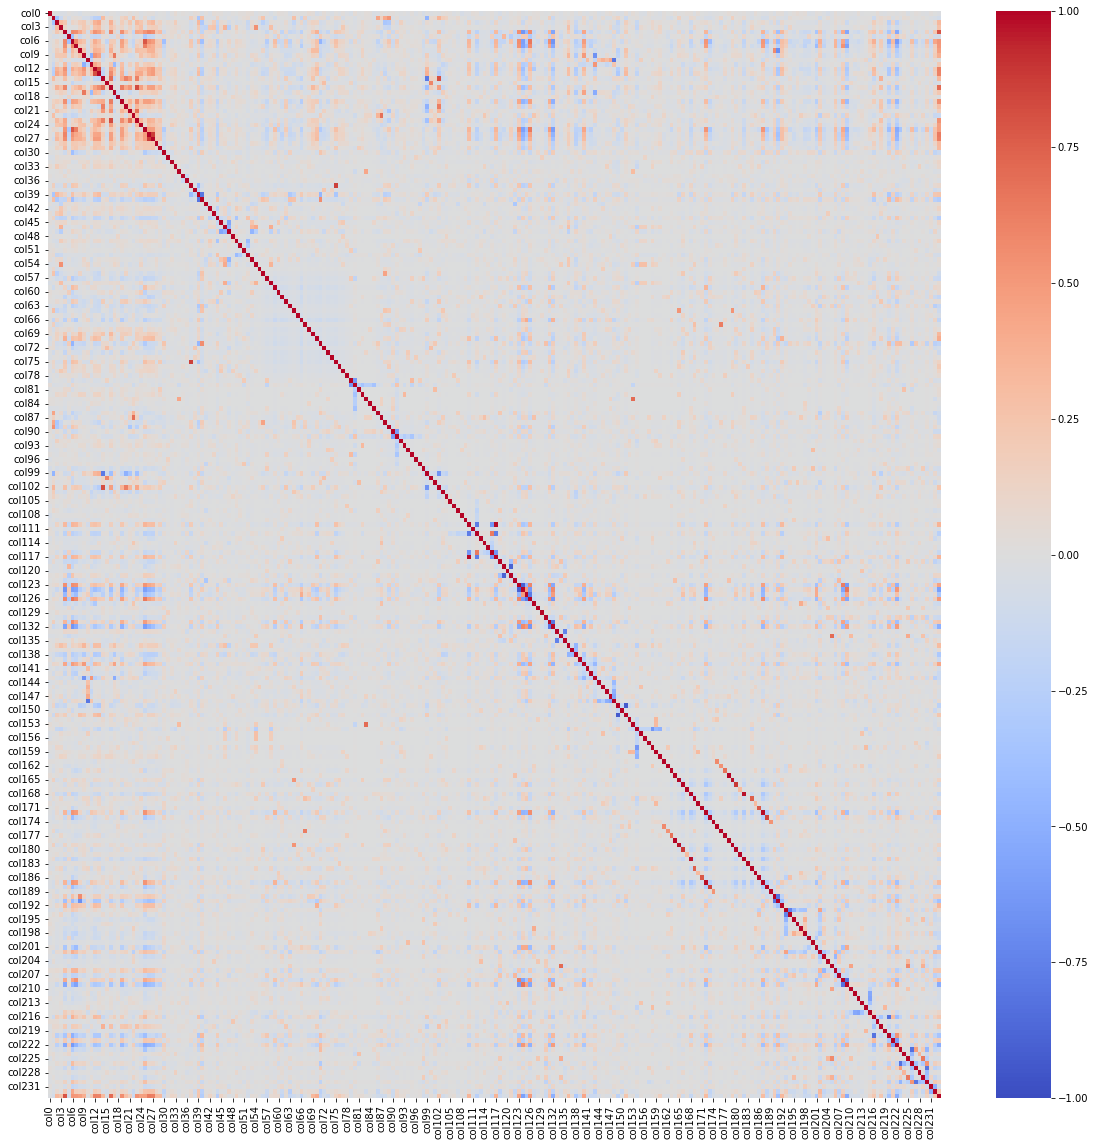

In [92]:
# plot the correlation matrix
corr_matrix = train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm')

In [93]:
# look at the correlation coefficients for different attributes with the `SalePrice` attribute
train_scaled.corr().reset_index()[['index','SalePrice']]

,index,SalePrice
0,col0,-0.021917
1,col1,-0.084284
2,col2,0.334901
3,col3,0.263843
4,col4,0.790982
...,...,...
229,col229,-0.063296
230,col230,0.135986
231,col231,-0.088623
232,col232,0.231968


Any attribute with a coefficient greater than `+0.15` and smaller than `-0.15` is picked and used. I had to test different values before concluding onto this. Starting from a value of `0.6`, this value was narrowed down to `0.15` because it gave better results on this value. The columns that are most correlated with `SalePrice` are chosen and stored for later use.

In [96]:
chosen_cols=[]
for item in train_scaled.corr().reset_index()[['index','SalePrice']].values:
    if item[1:2] >= 0.15 or item[1:2] <= -0.15:
        chosen_cols.append(item[0:1][0])

chosen_cols.remove('SalePrice')
# print(chosen_cols)

In [97]:
columns = chosen_cols
# print(columns)

# 5. ML Regression Model
I used `4` different regression techniques to predict the sale price of the houses. Among those four, the one that gave the best results was `XGBoost Regression`. A score of `0.14847` was achieved with `1000` estimators. 

Among the other techniuqes were: 
* `RandomForestRegressor`,
* `GradientBoostingRegressor`, and
* `Artificial Neural Networks`

In [101]:
# data_dmatrix = xgb.DMatrix(data = train_scaled[columns], label = pred_vals)

xgboost_reg = xgb.XGBRegressor(
    objective ='reg:squarederror', 
    colsample_bytree = 0.3, 
    learning_rate = 0.1,
    max_depth = 5, 
    alpha = 10, 
    n_estimators = 1000
)

xgboost_reg.fit(train_scaled[columns], pred_vals)
y_pred = xgboost_reg.predict(test_scaled[columns])

# 6. Submission
We will need to process our results by formulizing the results in a `csv` file. We will have the house `Id`'s and the predicted `SalePrice` side by side in a csv file.

In [102]:
y_pred_final = y_pred.reshape(-1, 1)

pred = pd.DataFrame(scaler.inverse_transform(y_pred_final))

sample_df = pd.read_csv('sample_submission.csv')

datasets = pd.concat([sample_df['Id'], pred],axis=1)
datasets.columns=['Id', 'SalePrice']

datasets.isnull()
datasets.to_csv('final_submission.csv', index=False)

datasets.head()

,Id,SalePrice
0,1461,114028.171875
1,1462,160850.656250
2,1463,190872.343750
3,1464,192419.984375
4,1465,186593.546875
